# Regression Model Evaluation 

### RMSE and $R^2$

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression
from math import sqrt

from regprepare import get_auto_mpg, train_val_test

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
train, val, test = train_val_test(df, stratify = 'mpg')
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

## Establish baseline and model predictions 

The Baseline is the mean of the actual values. <br>
A basic Linear Regression model will be used to make predictions

In [4]:
baseline = round(train['mpg'].mean(), 2)

In [5]:
preds = train[['horsepower', 'mpg']]

In [6]:
preds['baseline_preds'] = baseline
preds.head()

,horsepower,mpg,baseline_preds
212,180.0,16.5,23.5
346,67.0,32.3,23.5
325,48.0,44.3,23.5
90,198.0,12.0,23.5
246,52.0,32.8,23.5


In [7]:
ols_model = LinearRegression()

ols_model.fit(train[['horsepower']], train[['mpg']])

LinearRegression()

In [9]:
preds['yhat'] = ols_model.predict(train[['horsepower']])
preds.head()

,horsepower,mpg,baseline_preds,yhat
212,180.0,16.5,23.5,11.058302
346,67.0,32.3,23.5,30.114463
325,48.0,44.3,23.5,33.318596
90,198.0,12.0,23.5,8.022807
246,52.0,32.8,23.5,32.644042


## Compute residuals
Predictions minus actual

In [11]:
preds['baseline_res'] = preds['baseline_preds'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res
212,180.0,16.5,23.5,11.058302,7.0
346,67.0,32.3,23.5,30.114463,-8.8
325,48.0,44.3,23.5,33.318596,-20.8
90,198.0,12.0,23.5,8.022807,11.5
246,52.0,32.8,23.5,32.644042,-9.3


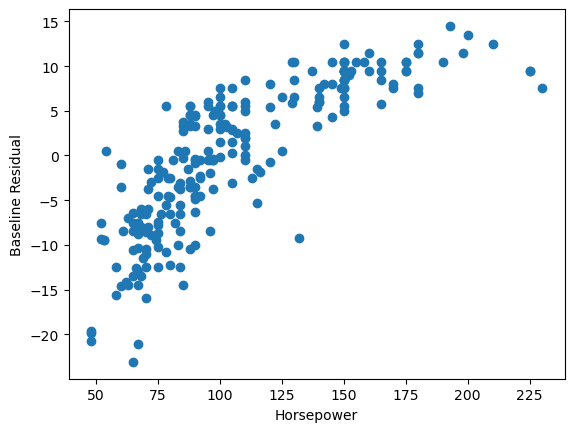

In [14]:
plt.scatter(preds['horsepower'], preds['baseline_res'])
plt.xlabel('Horsepower')
plt.ylabel('Baseline Residual')
plt.show()

In [17]:
preds['yhat_res'] = preds['yhat'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404
90,198.0,12.0,23.5,8.022807,11.5,-3.977193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958


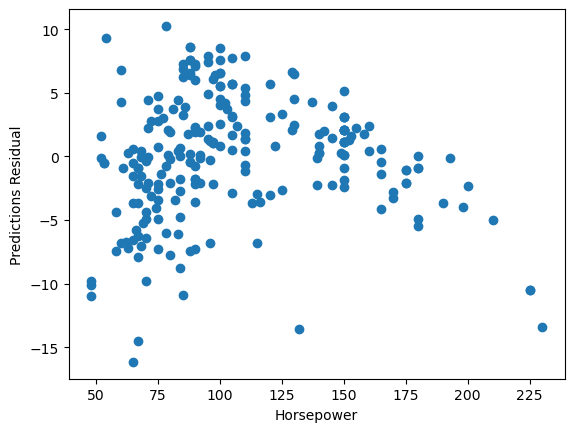

In [18]:
plt.scatter(preds['horsepower'], preds['yhat_res'])
plt.xlabel('Horsepower')
plt.ylabel('Predictions Residual')
plt.show()

## Compute SSE

SSE - Sum of Squared Errors

Also known as the RSS - Residual Sum of Squares

Predicted minus actual, squared and summed

In [20]:
preds.columns.to_list()

['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res', 'yhat_res']

In [21]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2
preds['yhat_res_sqaured'] = preds['yhat_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_sqaured
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [25]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_sqaured'].sum()
sse_baseline, sse_yhat

(15330.830000000002, 5355.469277811718)

## Compute MSE 

MSE - Mean Squared Error

Divide the SSE by the total number of data points

In [27]:
mse_baseline = sse_baseline/len(preds)
mse_yhat = sse_yhat/len(preds)
mse_baseline, mse_yhat

(65.23757446808511, 22.789230969411566)

## Compute RMSE 

RMSE - Root Mean Squared Error

Take the square root of the MSE

In [29]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)
rmse_baseline, rmse_yhat

(8.076978052965423, 4.773806758700185)

## Doing it all with the sklearn library

mean_squared_error

In [31]:
preds.columns.to_list()

['horsepower',
 'mpg',
 'baseline_preds',
 'yhat',
 'baseline_res',
 'yhat_res',
 'baseline_res_squared',
 'yhat_res_sqaured']

In [32]:
sqrt(mean_squared_error(preds['mpg'], preds['baseline_preds']))

8.076978052965423

In [33]:
sqrt(mean_squared_error(preds['mpg'], preds['yhat']))

4.773806758700185

In [34]:
mean_squared_error(preds['mpg'], preds['baseline_preds'], squared = False)

8.076978052965423

## Model Significance

Caluclating the $R^2$ value by hand

$R^2$ = ESS /TSS

## Compute ESS

ESS - Explained of Sum Squares

Prediction minus mean of actual values, sqaured and summed

In [35]:
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_sqaured
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [36]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_sqaured,yhat_mean_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042


In [39]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_sqaured,yhat_mean_res,yhat_mean_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698,154.795859
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463,43.751116
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596,96.404826
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193,239.543505
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042,83.613496


In [40]:
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

9975.360722188278

## Compute TSS

TSS - Total Sum of Squares

ESS + SSE

In [45]:
tss_baseline = sse_baseline + ess_baseline
tss_baseline

15330.830000000002

In [43]:
tss_yhat = sse_yhat + ess_yhat
tss_yhat

15330.829999999994

## Putting it all together

In [47]:
ess_baseline / tss_baseline

0.0

In [49]:
ess_yhat / tss_yhat

0.6506732330988134

## Using Sklearn library instead

explained_variance_score

In [50]:
explained_variance_score(preds['mpg'],preds['yhat'])

0.6506731545601601